In [1]:
# Homework 2 
# Treasury Squeeze Data Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import Image
import math

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [3]:
# Import data

f = open('E:\大学相关\硕士相关\IE517\Module 2\HW2\Treasury Squeeze test - DS1.csv')
df = pd.read_csv(f)
X = df.iloc[:, 2:11]
y = df.iloc[:, 11]
print(X.shape, y.shape)

(900, 9) (900,)


In [4]:
# Split train-test sets
# Test Size is 0.25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(675, 9) (675,)
(225, 9) (225,)


In [5]:
# Standardize data

sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

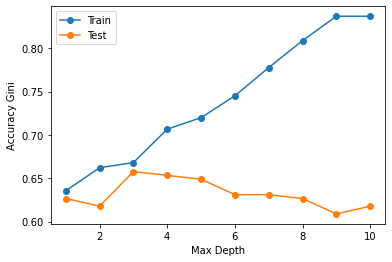

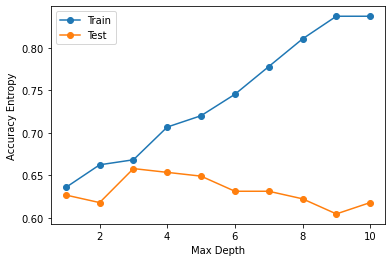

In [6]:
# Decision Tree
# Decision of Max Depth

md_range = range(1, 11)
scores_train_gini = []
scores_gini = []
scores_train_entropy = []
scores_entropy = []

for md in md_range:
    dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = md, 
                                     random_state = 1)
    dt_gini.fit(X_train_std, y_train)
    y_pred_dt_train_gini = dt_gini.predict(X_train_std)
    y_pred_dt_gini = dt_gini.predict(X_test_std)
    acscore_dt_train_gini = accuracy_score(y_train, y_pred_dt_train_gini)
    acscore_dt_gini = accuracy_score(y_test, y_pred_dt_gini)
    
    scores_train_gini.append(acscore_dt_train_gini)
    scores_gini.append(acscore_dt_gini)
    
    dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = md,
                                        random_state = 1)
    dt_entropy.fit(X_train_std, y_train)
    y_pred_dt_train_entropy = dt_entropy.predict(X_train_std)
    y_pred_dt_entropy = dt_entropy.predict(X_test_std)
    acscore_dt_train_entropy = accuracy_score(y_train, y_pred_dt_train_entropy)
    acscore_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)
    
    scores_train_entropy.append(acscore_dt_train_entropy)
    scores_entropy.append(acscore_dt_entropy)

plt.plot(range(1,11), scores_train_gini, 'o-', label = 'Train')
plt.plot(range(1,11), scores_gini, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Gini')
plt.show()

plt.plot(range(1,11), scores_train_entropy, 'o-', label = 'Train')
plt.plot(range(1,11), scores_entropy, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Entropy')
plt.show()

In [7]:
# Max Depth = 3
# Training Predicting and Evaluating

md = 3

dt_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = md, random_state = 1)
dt_gini.fit(X_train_std, y_train)
y_pred_dt_gini = dt_gini.predict(X_test_std)
acscore_dt_gini = accuracy_score(y_test, y_pred_dt_gini)

dt_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = md, random_state = 1)
dt_entropy.fit(X_train_std, y_train)
y_pred_dt_entropy = dt_entropy.predict(X_test_std)
acscore_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)

print("Accuracy Score of Gini: ", acscore_dt_gini)
print("Accuracy Score of Entropy: ", acscore_dt_entropy)

Accuracy Score of Gini:  0.6577777777777778
Accuracy Score of Entropy:  0.6577777777777778


In [8]:
# Show plot by gini

dot_data_gini = export_graphviz(dt_gini,
                           filled=True, 
                           rounded=True,
                           class_names=['True', 
                                        'False'],
                           feature_names=['price_crossing',
                                          'price_distortion',
                                          'roll_start',
                                          'roll_heart',
                                          'near_minus_next',
                                          'ctd_last_first',
                                          'ctd1_percent',
                                          'delivery_cost',
                                          'delivery_ratio'],
                           out_file=None) 
graph_gini = graph_from_dot_data(dot_data_gini) 
graph_gini.write_png('dt_gini.png')

True

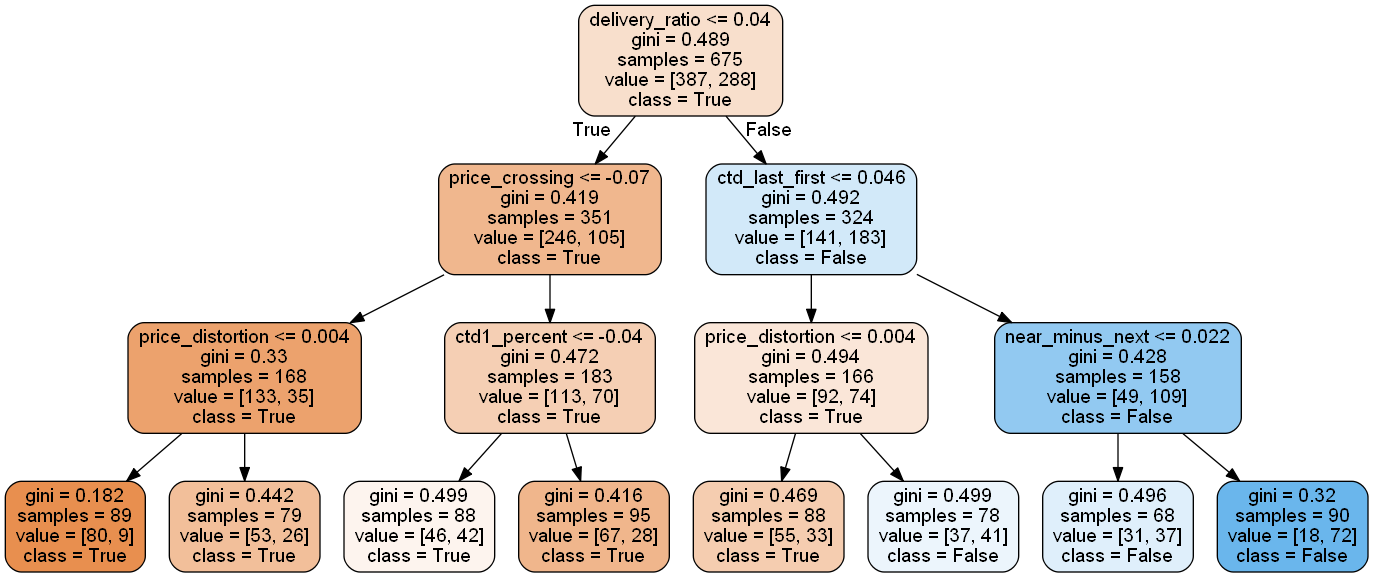

In [9]:
Image(filename='dt_gini.png')

In [10]:
# Show plot by entropy

dot_data_entropy = export_graphviz(dt_entropy,
                           filled=True, 
                           rounded=True,
                           class_names=['True', 
                                        'False'],
                           feature_names=['price_crossing',
                                          'price_distortion',
                                          'roll_start',
                                          'roll_heart',
                                          'near_minus_next',
                                          'ctd_last_first',
                                          'ctd1_percent',
                                          'delivery_cost',
                                          'delivery_ratio'],
                           out_file=None) 
graph_entropy = graph_from_dot_data(dot_data_entropy) 
graph_entropy.write_png('dt_entropy.png')

True

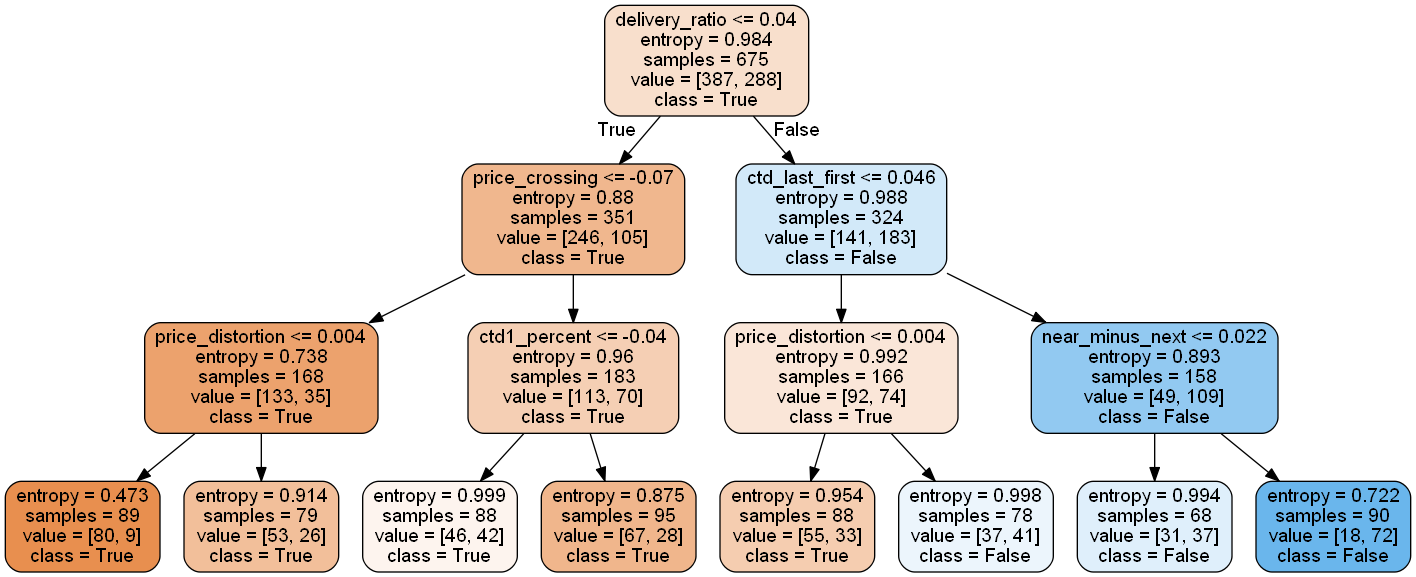

In [11]:
Image(filename='dt_entropy.png')

K =  1, Train score =  0.8133333333333334, Test score =  0.6355555555555555
K =  2, Train score =  0.7718518518518519, Test score =  0.6044444444444445
K =  3, Train score =  0.7822222222222223, Test score =  0.6266666666666667
K =  4, Train score =  0.7392592592592593, Test score =  0.6088888888888889
K =  5, Train score =  0.7274074074074074, Test score =  0.6088888888888889
K =  6, Train score =  0.7303703703703703, Test score =  0.5955555555555555
K =  7, Train score =  0.717037037037037, Test score =  0.6222222222222222
K =  8, Train score =  0.7125925925925926, Test score =  0.6088888888888889
K =  9, Train score =  0.7125925925925926, Test score =  0.6177777777777778
K =  10, Train score =  0.6977777777777778, Test score =  0.6
K =  11, Train score =  0.7037037037037037, Test score =  0.6044444444444445
K =  12, Train score =  0.6874074074074074, Test score =  0.6133333333333333
K =  13, Train score =  0.6962962962962963, Test score =  0.6177777777777778
K =  14, Train score =  

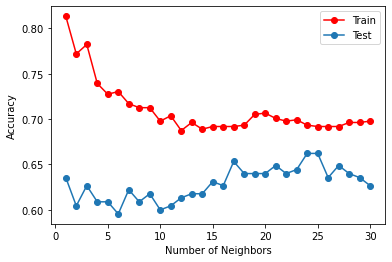

In [12]:
# KNN
# Description of results with different K

k_range = range(1, math.floor(math.sqrt(len(X))) + 1) # K in range [1,sqrt(n)] is better
scores_train = []
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train)
    y_pred_train = knn.predict(X_train_std)
    y_pred = knn.predict(X_test_std)
    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores.append(accuracy_score(y_test, y_pred))

# print results with different K
for k in k_range:
    print('K = ', k, end = ', ' )
    print('Train score = ', scores_train[k - 1], end = ', ' )
    print('Test score = ', scores[k - 1])


plt.plot(k_range, scores_train, 'ro-', label = 'Train')
plt.plot(k_range, scores, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

In [13]:
# K = 24
# Training Predicting and Evaluating

k = 24

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)

score_knn = accuracy_score(y_test, y_pred)

print("Accuracy Score of KNN: ", score_knn)

Accuracy Score of KNN:  0.6622222222222223


In [14]:
print("My name is Jingfan Xing")
print("My NetID is: jingfan5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jingfan Xing
My NetID is: jingfan5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
